<a href="https://colab.research.google.com/github/Alexander-Golovshchinskiy/Algorithms-In-Bioinformatics-Workshop-2025/blob/main/Algorithms_in_Bioinformatics_Session_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Where in the genome does the replication begin?





### 0.1 - Let's Go Back in Time!

Let’s travel back about 45 years, to a small molecular biology lab in the early 1980s.

There are no genome browsers, no databases, no Python notebooks.
Sequencing DNA means running radioactive gels by hand and reading faint black bands on X-ray film — one base at a time.

Now imagine you’re one of those scientists.

You’ve just isolated a small region of bacterial DNA that seems to let plasmids replicate on their own.
You print the sequence on paper, spread it across the lab bench, and start looking for patterns.

Suddenly, letter by letter, you mark repeated stretches — TTAT, TTAT, again and again.
It feels like the DNA is trying to *tell you something*...



### 0.2 - What's the crux?

A bacterial chromosome (here we'll be analysing *Vibrio cholerae*) is over one million nucleotides long.

Imagine we know from previous autoradiography experiments that replication starts at a single site — the origin of replication (oriC) — and proceeds in both directions. But can we find what the DNA signal for that origin looks like?..

In other words,

**How does the bacterial cell know to begin replication exactly in this short region within the much larger Vibrio cholerae chromosome, which consists of 1,108,250 nucleotides?**



### 0.3 - Hidden Messages in DNA

As we stated before, replication begins at a short, specific region called the **origin of replication (ori)**.

One must say and one would be right, that there must be some “hidden message” in the ori region ordering the cell to begin replication exactly there.


The question is how to find this hidden message without knowing what it looks like in advance?

 **In other words, can we find something that stands out in ori?**

In [ ]:
# @title What kind of question are we asking?
# @markdown _(Pick the most accurate description based on what you've read so far.)_
Choice = "We need to identify something unique about a specific region in DNA"  # @param ["We need to identify something unique about a specific region in DNA", "We need to alphabetically sort the DNA sequence", "We need to translate the DNA into protein", "We need to randomly pick a substring"]
if Choice == "We need to identify something unique about a specific region in DNA":
    print("✅ Exactly — our challenge is to find what makes one small region (the origin of replication) stand out from the rest of the DNA.")
else:
    print("❌ Not quite. We're not rearranging or translating DNA — we're trying to discover what makes one region different from all others.")


✅ Exactly — our challenge is to find what makes one small region (the origin of replication) stand out from the rest of the DNA.



### 1.1 — The Hidden Message Problem

As computational biologists, we shall treat DNA as a language like any other and ask: **Can we find a short substring (a “hidden message”) inside ori that stands out by appearing unusually often?**


In [ ]:
# @title Is the "Hidden Message Problem" well-defined yet?
# @markdown Based on the description below, decide whether this is already a fully defined computational problem or if something is missing.
# @markdown
# @markdown > **Hidden Message Problem:**
# @markdown > - **Input:** a string `DNA` (DNA segment)
# @markdown > - **Output:** A hidden message in `DNA`
# @markdown
# @markdown _(Select one answer and run the cell.)_

choice = "No, it's still vague — we haven't defined what 'hidden message' means"  # @param ["Yes, it's well-defined as written", "No, it's still vague — we haven't defined what 'hidden message' means", "Yes, because any string can have hidden messages", "No, because we haven't given an example DNA sequence"]

if choice == "No, it's still vague — we haven't defined what 'hidden message' means":
    print("✅ Correct! We know what the input and output *look like*, but we haven’t specified the **rule** that decides which substring qualifies as a hidden message.")
    print("\\n👉 A problem becomes well-defined only once we define measurable criteria — for example, 'the substring that appears most frequently' or 'appears more often than expected by chance.'")
else:
    print("❌ Not quite. Although we listed input and output, the problem isn’t yet well-defined — we haven’t formalized what counts as a 'hidden message.'")



### 1.2 Stating a computational problem

In otder to make it defined, we need to define what we measure.
We can’t just tell a computer to “find the hidden message” without saying **what makes a message hidden**.

If a short DNA word repeats **unusually often**, that might be the signal we’re looking for.

So the first measurable idea we can define is **frequency**:
> How many times does a given short sequence appear inside the DNA segment?

Our counting function will be `PatternCount(DNA, pattern)`, it will count the number of times `pattern` appears as a substring of `DNA` (including overlapping occurrences).



In [ ]:
# @title Predict the output of PatternCount
# @markdown Recall that `PatternCount(DNA, pattern)` counts how many times `pattern` appears as a substring of `DNA`, including overlapping occurrences.
# @markdown
# @markdown **Example:**
# @markdown `PatternCount("AAAA", "AA")` = 3 (matches at positions 0, 1, 2)
# @markdown
# @markdown Now predict the result for a slightly trickier case:
# @markdown
# @markdown `PatternCount("ATATATA", "ATA")` = ?
# @markdown
# @markdown _(Select your answer, then run the cell.)_

choice = "3"  # @param ["2", "3", "4", "5"]

if choice == "3":
    print("✅ Correct! The matches start at positions 0, 2, and 4 — three overlapping occurrences in total.")
else:
    print("❌ Not quite. Let's check: positions 0–2 → ATA, 2–4 → ATA, and 4–6 → ATA — that's 3 overlapping matches.")




### 1.3 — Turning Ideas Into Algorithms

So far, we’ve reasoned like scientists:  
We decided that to find the “hidden message,” we need a way to **measure** how often each short sequence appears inside our DNA segment.

Now we’ll start thinking like **computer scientists**:  
we’ll describe *step-by-step* what the computer should do to perform that counting task.

This is where **pseudocode** comes in — it’s a plain-language description of the algorithm we’ll later translate into Python.

In pseudocode, our task looks like this:


```
PatternCount(DNA, pattern)
    count ← 0
    for i ← 0 to |DNA| − |pattern|
        if DNA(i, |pattern|) = pattern
            count ← count + 1
    return count
```

If you're comfortable implementing this in Python, jump ahead to **Experienced Track** below.

If pseudocode looks confusing, continue to the **Beginner Track** which is the next block.

Remember, you can always ask any question if you feel stuck.

Most importantly, make sure you enjoy the process and have fun!

# Instructions:

1) Run the next cell once to activate the checking system (no need to read its code).

2) For each exercise, follow the directions shown on the right — then complete the code where you see the # TODO comment. Do NOT change the code of the first two lines - those are to set title and instructions.

3) After completing the exercise, run the next cell to check how you've done! Again, no need to read its code.

In [ ]:
# @title (Run once) Helpers + Scoring
from typing import Any, Callable

# Global score & solved-tracking dict
if "SCORE" not in globals():
    SCORE = 0
if "SOLVED" not in globals():
    SOLVED = {}

class CheckError(AssertionError):
    pass

def check_equal(name: str, got: Any, expected: Any):
    if got != expected:
        raise CheckError(f"{name} incorrect.\n  got      = {got!r}\n  expected = {expected!r}")

def check_bool(name: str, cond: bool, msg_if_fail: str):
    if not cond:
        raise CheckError(f"{name} failed.\n  {msg_if_fail}")

def run_checks(block: Callable[[], None]) -> bool:
    try:
        block()
    except CheckError as e:
        print("❌", e)
        return False
    except Exception as e:
        print("❌ Unhandled error while checking:", type(e).__name__, e)
        return False
    else:
        print("✅ All checks passed!")
        return True

def credit(exercise: str, ok: bool, pts: int = 1):
    """Grant credit once per exercise if newly solved."""
    global SCORE
    if ok and not SOLVED.get(exercise, False):
        SCORE += pts
        SOLVED[exercise] = True
        print(f"🏅 First time solved: +{pts} point(s). Total score = {SCORE}")
    elif ok and SOLVED.get(exercise, False):
        print(f"ℹ️ Already solved earlier. Score = {SCORE}")
    else:
        print(f"❌ Not yet solved. Score = {SCORE}")


# Beginner Track

**Note:** we're assuming that you've completed sections 'String basics' and 'Variables' at https://futurecoder.io/course/#toc. You might find researching what Python function `len()` does helpful.

In [ ]:
# @title What does the built-in function `len()` do in Python?
# @markdown _(Pick the most accurate answer, then run the cell.)_

choice = "It returns the number of items in a sequence or collection"  # @param ["It converts a string to lowercase", "It counts how many times a letter appears", "It returns the number of items in a sequence or collection", "It generates a random number"]

if choice == "It returns the number of items in a sequence or collection":
    print("✅ Correct! `len()` returns the number of elements in a sequence — for example, the number of characters in a string.")
else:
    print("❌ Not quite. `len()` doesn’t look for specific letters or change case; it tells you **how long** the object is — e.g., how many characters are in a string.")


In [ ]:
# @title Exercise 1 - Length of the DNA string (Student cell)
# @markdown Set `dna_length` to the length of DNA, then print it.

DNA = "ATCAATATTTGCGGATCGATTGGGCCATATGTGGCGTCGTGTATATCGATCGATCGACTGACT"

# TODO: Replace ... with the correct expressions
dna_length = ...   # e.g., len(DNA)

# show it
print()


In [ ]:
# @title Check: Exercise 1 — DNA length
def _check_e1():
    check_bool("dna_length exists", "dna_length" in globals(),
               "Please define a variable named `dna_length`.")
    check_bool("dna_length is int", isinstance(dna_length, int),
               f"`dna_length` must be an int, got {type(dna_length).__name__}.")
    expected = len(DNA)
    check_equal("dna_length", dna_length, expected)

ok = run_checks(_check_e1)
credit("Exercise 1", ok, pts=1)


✅ All checks passed!
ℹ️ Already solved earlier. Score = 1


## Exercise 2 — Indexing & Slicing

Fill the variables using Python indexing/slicing on `DNA`. Then print them.


In [ ]:
# Use the same DNA from Exercise 1 (assumed to be defined)
# TODO:

first_char   = DNA[0]
last_char    = ...
first_three  = ...
last_three   = ...

print()
print()
print()
print()

In [ ]:
# @title Check: Exercise 2
def _check_e2():
    check_bool("first_char", "first_char" in globals(), "Define first_char")
    check_bool("last_char", "last_char" in globals(), "Define last_char")
    check_bool("first_three", "first_three" in globals(), "Define first_three")
    check_bool("last_three", "last_three" in globals(), "Define last_three")

    check_equal("first_char", first_char, DNA[0])
    check_equal("last_char",  last_char,  DNA[-1])
    check_equal("first_three", first_three, DNA[:3])
    check_equal("last_three",  last_three, DNA[-3:])
ok = run_checks(_check_e2)
credit("Exercise 2", ok, pts=1)


❌ last_char incorrect.
  got      = Ellipsis
  expected = 'C'
❌ Not yet solved. Score = 1


In [ ]:
# @title How long is DNA[i:i+k] assuming 0 ≤ i ≤ n-k?
choice = "Exactly k"  # @param ["Exactly k", "At most k", "Depends", "Undefined"]
print("✅ Correct." if choice=="Exactly k" else "❌ End-exclusive slicing yields length k.")


✅ Correct.


In [ ]:
# @title Exercise 3 — Slice by (i, k)
# @markdown Set `i` and `k`, then produce the slice `window`.

i = 5    # @param {type:"number"}
k = 9    # @param {type:"number"}

#TODO
window = ...   # e.g., DNA[i:i+k]

print(window)

Ellipsis


In [ ]:
# @title Check: Exercise 3
def _check_e3():
    check_bool("window", "window" in globals(), "Define `window`.")
    check_equal("window", window, DNA[i:i+k])
ok = run_checks(_check_e3)
credit("Exercise 3", ok, pts=1)


❌ window incorrect.
  got      = Ellipsis
  expected = 'TATTTGCGG'
❌ Not yet solved. Score = 0


In [ ]:
# @title What's the last valid start index?
# @markdown Assume `pattern` length `k` is 10, and `DNA` length `n` is 1000.
# @markdown For a window `DNA[i:i+k]`, what is the **last** valid `i` so the slice stays inside the string?
# @markdown _(Pick one, then run the cell.)_
# @markdown
# @markdown Remember about 0-based indexing in Python!

# Use the current DNA automatically (if defined)
n = len(DNA) if "DNA" in globals() else 20  # fallback demo value

choice = "989"  # @param ["991", "989", "990"]

if choice == "990":
    print(f"✅ Correct. With n={n} and k={k}, the last valid start i is n-k = {n-k}.")
    print("Reason: i+k must be ≤ n → i ≤ n-k = 990.")
else:
    print("❌ Not quite.")
    print("For DNA[i:i+k] to fit, we need i+k ≤ n → i ≤ n-k. What is n-k in this case?")


❌ Not quite.
Python slices are end-exclusive. For DNA[i:i+k] to fit, we need i+k ≤ n → i ≤ n-k. What is n-k in this case?


## Exercise 4 - Check if pattern matches the string

We've defined `pattern = "ATA"` with its length `k` and some start index `i`.

Your goal is to complete the `if` statement in order to check if pattern matches `DNA[i:i+k]` at that start index.

In [ ]:
pattern = "ATA"
k = len(pattern)
i = 7

#TODO
if ...:
  print("True")
else:
  print("False")



79

In [ ]:
# @title Check: Exercise 4 — First occurrence
def _check_e4():
    # Ensure DNA and pattern exist
    check_bool("DNA", "DNA" in globals(), "Please make sure `DNA` is defined.")
    check_bool("pattern", "pattern" in globals(), "Please make sure `pattern` is defined.")

    # Capture the student’s output safely
    try:
        student_result = DNA.find(pattern)
    except Exception as e:
        raise CheckError(f"Error while calling DNA.find(pattern): {e}")

    # Compute expected result independently
    expected = DNA.find(pattern)

    check_equal("first occurrence index", student_result, expected)

ok = run_checks(_check_e4)
credit("Exercise 4", ok, pts=1)


✅ All checks passed!
🏅 First time solved: +1 point(s). Total score = 3


In [ ]:
# @title What's the correct `range()` limit?
# @markdown We know the **last valid start index** is `i = n - k`.
# @markdown
# @markdown If we want to loop through *all* valid starting indices using `range()`,
# @markdown what should be the **upper limit** of that `range()` (it's `stop`)?
# @markdown
# @markdown _(Pick one, then run the cell.)_
# @markdown
# @markdown **Hint:** Python’s `range(start, stop)` is **end-exclusive**,
# @markdown so it goes **up to but not including** the value of `stop`.

choice = "n-k+1"  # @param ["n-k+1", "n-k", "n-k-1"]

if choice == "n-k+1":
    print(f"✅ Correct! The last valid start index is n - k = {n - k}.")
    print(f"So to include i = {n - k} in the loop, the upper limit must be n - k + 1 = {n - k + 1}.")
    print()
    print("Example:")
    print("for i in range(n - k + 1):")
    print("    window = DNA[i:i+k]")
    print("    # This goes through all valid windows, from i=0 to i=990.")
elif choice == "n-k":
    print("❌ Almost there!")
    print("If you use range(n - k), the loop will stop at i = n - k - 1, missing the final valid window.")
    print("Remember, range() stops *before* its upper limit.")
else:
    print("❌ Not quite.")
    print("That range would stop far too early, skipping the last few valid windows.")
    print("We need the upper limit to be n - k + 1 so that the loop includes i = n - k.")


## Exercise 5 — Count all occurences of pattern


We've defined `pattern = "ATA"` below.

Build a list of indices where DNA[i:i+k] == pattern (overlaps allowed).

For that, you'll need to complete the `for` loop range. Remember, `range` is end-exclusive!

In [ ]:
pattern = "ATA"
k = len(pattern)

count = 0

# TODO: loop over all valid i and append hits
for i in range(...):
    if pattern == [DNA[i:i+k]]:
        count += 1

print(count)

In [ ]:
# @title Check: Exercise 5
def _check_e5():
    # Recompute truth
    truth = []
    if k > 0:
        for j in range(0, len(DNA)-k+1):
            if DNA[j:j+k] == pattern:
                truth.append(j)
    check_equal("match_indices", match_indices, truth)
ok = run_checks(_check_e5)
credit("Exercise 5", ok, pts=2)


## Implement PatternCount

We're now ready to implement our Counting function!

Complete the for loop and if condition in order to have a function that takes in any `DNA` string and `pattern` and finds number of occurences of `pattern` in it.

In [ ]:
def PatternCount(DNA, pattern):
    # TODO: implement using the ideas above
    count = 0
    n, k = len(DNA), len(pattern)
    for i in range(...):
        if ...:
            count += 1
    return count


In [ ]:
# @title Check: Exercise 8 — PatternCount
def _check_e8():
    tests = [
        ("AAAA", "AA", 3),
        ("ATATATA", "ATA", 3),
        ("banana", "ana", 1),
        ("mississippi", "issi", 1),
        ("", "A", 0),
        ("ACGT", "", 0),
        ("ACACTGACACTG", "ACT", 4),
    ]
    for dna, pat, want in tests:
        got = PatternCount(dna, pat)
        check_equal(f"PatternCount({dna!r}, {pat!r})", got, want)
ok = run_checks(_check_e8)
credit("Exercise 8", ok, pts=3)


❌ PatternCount('banana', 'ana') incorrect.
  got      = 2
  expected = 1
❌ Not yet solved. Score = 3




# Experienced Track

### Exercise 1

Implement the function `PatternCount` below using pseudocode provided:

```
PatternCount(DNA, pattern)
    count ← 0
    for i ← 0 to |DNA| − |pattern|
        if DNA(i, |pattern|) = pattern
            count ← count + 1
    return count
```


In [ ]:
# @title What does PatternCount do? 🧬
# @markdown In the pseudocode below:
# @markdown
# @markdown ```
# @markdown PatternCount(DNA, pattern)
# @markdown     count ← 0
# @markdown     for i ← 0 to |DNA| − |pattern|
# @markdown         if DNA(i, |pattern|) = pattern
# @markdown             count ← count + 1
# @markdown     return count
# @markdown ```
# @markdown What does this algorithm compute?

choice = "Counts how many times `pattern` appears in `DNA`"  # @param ["Counts how many times `pattern` appears in `DNA`", "Finds the longest pattern in DNA", "Finds first occurrence of pattern only"]

if choice == "Counts how many times `pattern` appears in `DNA`":
    print("✅ Correct! It slides a window of length |pattern| across DNA and counts matches.")
else:
    print("❌ Not quite. It doesn’t search just once — it checks every window and counts all matches.")


## Exercise 1 — Implement PatternCount

Fill in the code so that it counts how many times `pattern` occurs in `DNA`.

In [ ]:
def PatternCount(DNA, pattern):
    count = 0
    k = len(pattern)
    n = len(DNA)
    for i in range(...):
        if ...:
            count += 1
    return count



In [ ]:
# @title Check Your Implementation
DNA = 'GCGCG'
pattern = 'GCG'
assert PatternCount(DNA, pattern) == 2, "Test 1 failed"
DNA = 'ATCCGATCCCATGCCCATG'
pattern = 'CC'
assert PatternCount(DNA, pattern) == 5, "Test 2 failed"
print("🎉 All tests passed — PatternCount works correctly!")


### From Pattern Counting to Most Frequent Patterns

The next natural step would be to use our counting function to find **most frequent** k-mers in a DNA string.

We say that pattern is a most frequent k-mer in DNA if it **maximizes** Count(DNA, pattern) among all k-mers. You can see that ACTAT is a most frequent 5-mer of ACA**ACTAT**GCAT**ACTAT**CGGGA**ACTAT**CCT, and ATA is a most frequent 3-mer of CG**ATATA**TCC**ATA**G.


In [ ]:
# @title  Can a string have multiple most frequent k-mers?
# @markdown Suppose we’re counting all k-length substrings (k-mers) in a DNA string.
# @markdown If two or more distinct k-mers occur the same maximum number of times,
# @markdown what happens?
# @markdown
# @markdown _(Pick the statement that best describes the situation.)_

choice = "Yes, multiple k-mers can tie for the maximum count"  # @param ["No, there can be only one most frequent k-mer", "Yes, multiple k-mers can tie for the maximum count", "It depends on whether k divides the length of DNA"]

if choice == "Yes, multiple k-mers can tie for the maximum count":
    print("✅ Correct! A string can absolutely have **multiple most frequent k-mers** — they simply share the same highest frequency.")
    print("For example, in DNA = 'ATATCGCG', with k = 2, both 'AT' and 'CG' might appear twice.")
else:
    print("❌ Not quite.")
    print("The 'most frequent' k-mer set can contain more than one pattern — any k-mers that occur the maximum number of times are all considered 'most frequent.'")


A straightforward algorithm for finding the most frequent k-mers in a string DNA checks all k-mers appearing in this string (there are `|DNA| − k + 1` such k-mers) and then computes how many times each k-mer appears in DNA. To implement this algorithm, called FrequentWords, we will need to generate an array `Count`, where `Count(i)` stores `Count(DNA, pattern)`
for `pattern = DNA(i, k)` (see figure below).

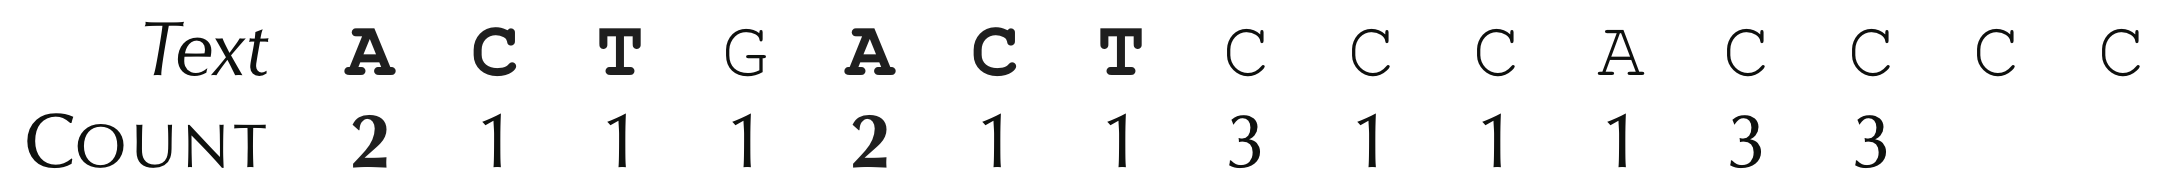

In [ ]:
# @title ⚙️ Algorithm Efficiency Check — How many passes through DNA?
# @markdown Consider the naive FrequentWords algorithm:
# @markdown
# @markdown - It slides a window across the DNA string.
# @markdown - For each window (each k-mer), it calls `PatternCount`,
# @markdown   which itself scans the **entire DNA** to count occurrences.
# @markdown
# @markdown How many total passes through the DNA does this algorithm require?

choice = "About n passes (one for each window)"  # @param ["1 pass total", "About n passes (one for each window)", "k passes total"]

if choice == "About n passes (one for each window)":
    print("✅ Correct! The outer loop slides through roughly n windows, and each call to PatternCount scans the whole DNA.")
    print("That means the total work is proportional to n × n = O(n²), making this algorithm inefficient for long DNA strings.")
else:
    print("❌ Not quite.")
    print("Remember: each PatternCount call performs a *full scan* of the DNA. Since we call it once per window, we effectively do about n total passes, i.e. O(n²) work.")


If you were to solve the Frequent Words Problem by hand for a small example, you would probably form a table like the one in the figure below for `DNA` equal to "ACGTTTCACGTTTTACGG" and `k` equal to 3. You would slide a length-k window, and if the current k-mer substring of text does not occur in the table, then you would create a new entry for it. Otherwise, you would add 1 to the entry corresponding to the current k-mer substring of `DNA`. We call this table the **frequency table** for Text and k.

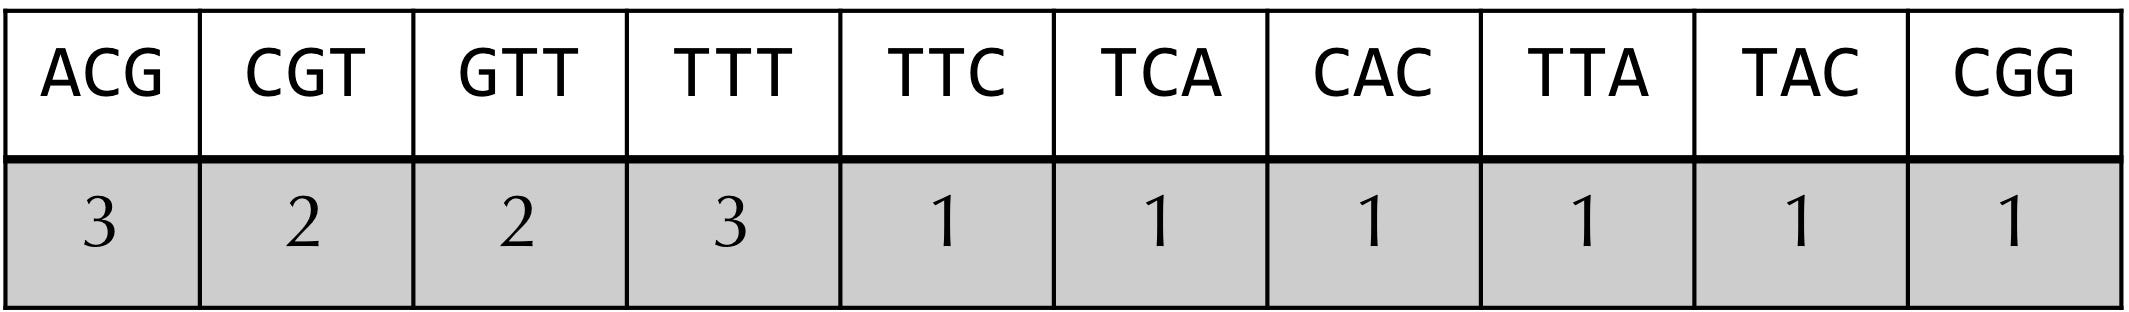

In [ ]:
# @title 🧩 Choosing the Right Data Structure
# @markdown We want to build a **frequency map** that keeps track of how many times each k-mer appears in DNA.
# @markdown Each k-mer (like "ATG" or "GCA") should be stored **alongside its count**.
# @markdown
# @markdown Which data structure in Python is best suited for this task?

choice = "Dictionary (hash map)"  # @param ["List", "Set", "Dictionary (hash map)", "Tuple"]

if choice == "Dictionary (hash map)":
    print("✅ Correct! A dictionary maps keys (k-mers) to values (counts) efficiently, with average O(1) lookup and update time.")
    print("We'll use it to store k-mer → count pairs in our FrequencyTable function.")
else:
    print("❌ Not quite.")
    print("Lists and tuples don't directly map keys to values, and sets only store unique items without counts.")
    print("A dictionary (hash map) is ideal for storing and updating k-mer counts.")




### Exercise 2

Implement the FrequencyTable function using pseudocode provided:

```
FrequencyTable(DNA, k)
    freqMap ← empty map
    n ← |DNA|
    for i ← 0 to n − k
        Pattern ← DNA(i, k)
        if freqMap[Pattern] doesn't exist
            freqMap[Pattern]← 1
        else
           freqMap[pattern] ←freqMap[pattern]+1
    return freqMap
```

In [ ]:
def FrequencyTable(DNA, k):
    freqMap = ...          # initialize empty dictionary
    n = len(DNA)
    for i in range(...):   # slide the window across DNA
        pattern = ...    # extract k-mer substring
        if pattern not in freqMap:
            freqMap[pattern] = 1
        else:
            freqMap[pattern] += 1
    return freqMap

In [ ]:
# @title ✅ Test Your FrequencyTable
DNA = "ACGTTTCACGTTTTACGG"
k = 3

freqs = FrequencyTable(DNA, k)

# Simple correctness checks
assert freqs["ACG"] == 2, "ACG should appear twice"
assert freqs["TTT"] == 2, "TTT should appear twice"
assert freqs["TTC"] == 1, "TTC should appear once"

print("🎉 Great work! Your FrequencyTable correctly counts k-mer frequencies.")
print("Sample output:")
for kmer, count in list(freqs.items())[:5]:
    print(f"{kmer}: {count}")


TypeError: 'ellipsis' object cannot be interpreted as an integer

Once we have built the frequency table for a given `DNA` and `k`, we can find all frequent k-mers if we determine the maximum value in the table, and then identify the keys of the frequency table achieving this value, appending each one that we find to a growing list.

Last helper function that we'll need for our `FrequentWords` function is `MaxMap`, that takes a map (dictionary) of strings to integers as an input and returns the maximum value of this map as output.

### Exercise 3

Using basic operations with dictionaries in Python, write the function `MaxMap`, that should take in the dictionary `freqMap` and return the maximum value of it.

In [ ]:
def MaxMap(freqMap):
    pass

Now, we're finally ready to solve the **Most Frequent Words** Problem.

### Exercise 4

Implement the `FrequentWords` function using the pseudocode below:

```
FrequentWords(DNA, k)
    FrequentPatterns ← an array of strings of length 0
    freqMap ← FrequencyTable(DNA, k)
    max ← MaxMap(freqMap)
    for all strings Pattern in freqMap
        if freqMap[pattern] = max
            append Pattern to frequentPatterns
    return frequentPatterns
```



Input: A string `DNA` and an integer `k`.
Output: All most frequent k-mers in `DNA`.


In [ ]:
def FrequentWords(DNA, k):
    # Build the frequency table for all k-mers
    freqMap = FrequencyTable(...)

    # Find the maximum frequency value
    max_count = MaxMap(...)

    frequentPatterns = []
    for pattern in freqMap:
        # Add a condition to check if this pattern is one of the most frequent
        if ...:
            frequentPatterns.append(pattern)

    return frequentPatterns

In [ ]:
# @title ✅ Test Your FrequentWords Function
DNA = 'ACGTTGCATGTCGCATGATGCATGAGAGCT'
k = 4

result = FrequentWords(DNA, k)
print("Most frequent 4-mers:", result)

assert set(result) == {'CATG', 'GCAT'}, f"Unexpected result: {result}"
print("🎉 Great job! Your FrequentWords implementation works correctly.")


## Exercise 5

Let's imagine that our collaborators from Mars sequences some Marsian bacteria and found their ori sequence to be `ori`.

Let's use our `FrequentWords` function to find most frequent 9-mer inside that sequence.

In [ ]:
ori = "atcaatgatcaacgtaagcttctaagcatgatcaaggtgctcacacagtttatccacaacctgagtggatgacatcaagataggtcgttgtatctccttcctctcgtactctcatgaccacggaaagatgatcaagagaggatgatttcttggccatatcgcaatgaatacttgtgacttgtgcttccaattgacatcttcagcgccatattgcgctggccaaggtgacggagcgggattacgaaagcatgatcatggctgttgttctgtttatcttgttttgactgagacttgttaggatagacggtttttcatcactgactagccaaagccttactctgcctgacatcgaccgtaaatgataatgaatttacatgcttccgcgacgatttacctcttgatcatcgatccgattgaagatcttcaattgttaattctcttgcctcgactcatagccatgatgagctcttgatcatgtttccttaaccctctattttttacggaagaatgatcaagctgctgctcttgatcatcgtttc"
k = 9

def FrequentWords(DNA, k):
  ...
  return ...

print(FrequentWords(DNA, k))


## Why did we choose k to be 9?

We know that the initiation of replication is mediated by DnaA, a protein that binds to a short segment within the ori known as a DnaA box. You can think of the DnaA box as a message within the DNA sequence telling the DnaA protein: “bind here!”.

We highlight a most frequent 9-mer instead of using some other value of k because experiments have revealed that bacterial DnaA boxes are usually nine nucleotides long. The probability that there exists a 9-mer appearing three or more times in a randomly generated DNA string of length 500 is approximately 1/1300.

In [ ]:
# @title 🧬 How many most frequent 9-mers do we have in this ori region?
# @markdown Using your `FrequentWords` (or frequency table) function, you found the most frequent 9-mers in the given `ori` DNA sequence.
# @markdown
# @markdown
# @markdown Based on your result, how many of them are there?

choice = 4  # @param [1, 2, 3, 4]

if choice == 4:
    print("✅ Correct! There are 4 distinct 9-mers that each occur at least three times.")
    print("These repeats suggest a potential biological significance — for example, in replication origin motifs.")
else:
    print("❌ Not quite.")
    print("Check your frequency table — there are *four* 9-mers that each appear three or more times: ATGATCAAG, CTTGATCAT, TCTTGATCA, and CTCTTGATC.")


## Some messages are more surprising than others...

Isn't it weird that we have 4 different 9-mers in that `ori`?

How would we know which one is actually the right one? Are all the 'hidden messages' the same or are some more surprising than others?

## Reverse Complementarity

Recall that nucleotides A and T are complements of each other, as are G and C. Having one strand and a supply of “free floating” nucleotides, one can imagine the synthesis of a complementary strand on a template strand. This model of replication was confirmed rigorously by Meselson and Stahl in 1958.

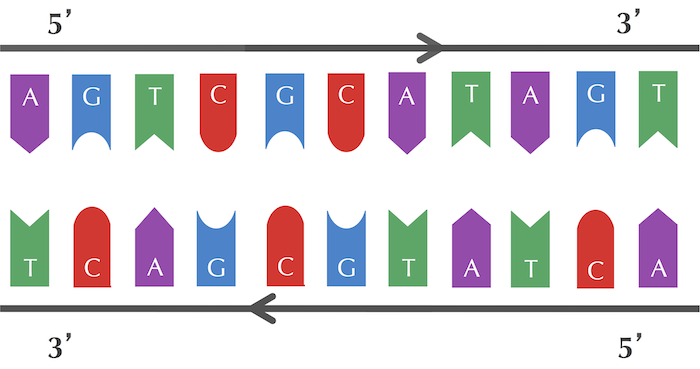

## Exercise 6 - Solve the reverse complement problem

The reverse complement of a string Pattern = p1 … pn is the string Patternrc = pn* … p1* formed by taking the complement of each nucleotide in Pattern, then reversing the resulting string. We will need the solution to the following problem throughout this chapter:

Reverse Complement Problem: Find the reverse complement of a DNA string.

    Input: A DNA string Pattern.
    Output: Patternrc , the reverse complement of Pattern.


In [ ]:
def ReverseComplement(pattern):
  ...
  return patternrc

In [ ]:
# @title ✅ Check Your ReverseComplement Function

try:
    assert ReverseComplement("AAAACCCGGT") == "ACCGGGTTTT"
    assert ReverseComplement("ATGC") == "GCAT"
    assert ReverseComplement("A") == "T"
    assert ReverseComplement("GGATCC") == "GGATCC"  # palindrome check
    print("🎉 All tests passed! Your ReverseComplement function works correctly.")
except AssertionError:
    print("❌ One or more tests failed.")
    print("Hint: Make sure you first complement each base (A↔T, C↔G) and then reverse the entire string.")


Look again at the four most frequent 9-mers in the ori sequence we have: ATGATCAAG, CTTGATCAT, TCTTGATCA, and CTCTTGATC. Now do you notice anything surprising?

Interestingly, among the four most frequent 9-mers in ori of Vibrio cholerae, ATGATCAAG and CTTGATCAT are reverse complements of each other, resulting in the six total occurrences of these strings shown below.

atcaatgatcaacgtaagcttctaagc**ATGATCAAG**gtgctcacacagtttatccacaac ctgagtggatgacatcaagataggtcgttgtatctccttcctctcgtactctcatgacca cggaaag**ATGATCAAG**agaggatgatttcttggccatatcgcaatgaatacttgtgactt gtgcttccaattgacatcttcagcgccatattgcgctggccaaggtgacggagcgggatt acgaaagcatgatcatggctgttgttctgtttatcttgttttgactgagacttgttagga tagacggtttttcatcactgactagccaaagccttactctgcctgacatcgaccgtaaat tgataatgaatttacatgcttccgcgacgatttacct**CTTGATCAT**cgatccgattgaag atcttcaattgttaattctcttgcctcgactcatagccatgatgagct**CTTGATCAT**gtt tccttaaccctctattttttacggaaga**ATGATCAAG**ctgctgct**CTTGATCAT**cgtttc


Finding a 9-mer that appears six times (either as itself or as its reverse complement) in a DNA string of length 500 is far more surprising than finding a 9-mer that appears three times (as itself).

In [ ]:
# @title What’s special about these two 9-mers?
# @markdown Among the four most frequent 9-mers in the *ori* region of *Vibrio cholerae*,
# @markdown **ATGATCAAG** and **CTTGATCAT** are **reverse complements** of each other.
# @markdown Together, they occur six times in total across the region.
# @markdown
# @markdown What does this relationship between the two sequences suggest?
# @markdown
# @markdown _(Pick the best explanation.)_

choice = "They likely represent the same binding site on opposite strands"  # @param ["They’re unrelated repeats", "They likely represent the same binding site on opposite strands", "They occur together by random chance"]

if choice == "They likely represent the same binding site on opposite strands":
    print("✅ Correct! Reverse complements often correspond to the **same functional motif** found on opposite DNA strands.")
    print("Here, ATGATCAAG and CTTGATCAT likely represent the same DnaA box sequence read in opposite directions.")
else:
    print("❌ Not quite.")
    print("Because these two 9-mers are reverse complements, they’re not independent repeats.")
    print("They likely correspond to the same **biological binding site**—one on each strand of the double helix.")


However, before concluding that we have found the DnaA box of Vibrio cholerae, the careful bioinformatician should check if there are other short regions in the Vibrio cholerae genome exhibiting multiple occurrences of ATGATCAAG (or CTTGATCAT). After all, maybe these strings occur as repeats throughout the entire Vibrio cholerae genome, rather than just in the ori region. To this end, we need to solve the following problem.

## Exercise 7 - Pattern Matching Problem:

Find all occurrences of a pattern in a string. Note that this function is very similar to `PatternCount` function

    Input: Strings Pattern and Genome.
    Output: All starting positions in Genome where Pattern appears as a substring.


In [ ]:
def PatternMatching(DNA, pattern):
  positions = []
  k = len(pattern)
  n = len(DNA)

  for i in range(...):
    if ...:
      positions.append(...)
  return positions

In [ ]:
# @title ✅ Check Your PatternMatching Function

try:
    # Test 1 — Example from textbook/Bioinformatics I
    DNA = "GATATATGCATATACTT"
    pattern = "ATAT"
    assert PatternMatching(DNA, pattern) == [1, 3, 9]

    # Test 2 — Overlapping matches
    DNA = "AAAAA"
    pattern = "AA"
    assert PatternMatching(DNA, pattern) == [0, 1, 2, 3]

    # Test 3 — No matches
    DNA = "GCGCGC"
    pattern = "TTT"
    assert PatternMatching(DNA, pattern) == []

    # Test 4 — Match at end
    DNA = "TTGACAT"
    pattern = "CAT"
    assert PatternMatching(DNA, pattern) == [4]

    print("🎉 All tests passed! Your PatternMatching function works correctly.")
except AssertionError:
    print("❌ One or more tests failed.")
    print("Hint: Make sure your loop runs from i = 0 to n - k (inclusive) and checks whether DNA[i:i+k] == pattern.")
    print("The function should return a list of all valid starting indices (0-based).")


## Let's scale it up!

Time to get our hands dirty and use our `PatternMatching` function on the whole genome of the bacterium Vibrio cholerae.

Before coming to the next session,

1) Try to write some code that would return a space-separated list of starting positions (in increasing order) where CTTGATCAT appears as a substring in the Vibrio cholerae genome. We'll start the next session with writing it together.

2) Think whether that supports our hypothesis that CTTGATCAT and it's reverse complement is indeed the DNAa box.

3) Think whether we can conclude that ATGATCAAG/CTTGATCAT also represents a DnaA box in other bacterial genomes?

You can find the genome file in the Files section of the Teams channel and on the github page.